In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

origin_bg = cv2.imread('green_bg.png', 1)
origin_bg = cv2.resize(origin_bg, (678, 381))

ob_image = cv2.imread('object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

target_bg = cv2.imread('target_bg.jpg', 1)
target_bg = cv2.resize(target_bg, (678, 381))

In [45]:
def calc_diff(bg_img, input_img):
    diff_three_channel = cv2.absdiff(bg_img, input_img)
    diff_single_channel = np.sum(diff_three_channel, axis=2) / 3.0
    diff_single_channel = diff_single_channel.astype('uint8')

    return diff_single_channel

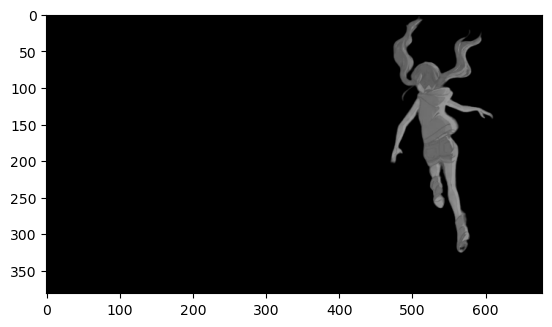

In [46]:
diff_single_channel = calc_diff(origin_bg, ob_image)

plt.imshow(cv2.cvtColor(diff_single_channel, cv2.COLOR_BGR2RGB))

In [47]:
def compute_bin_mask(diff_single_channel):
    diff_binary = np.where(diff_single_channel >= 15, 255, 0)
    diff_binary = np.stack((diff_binary,)*3, axis=-1)
    return diff_binary

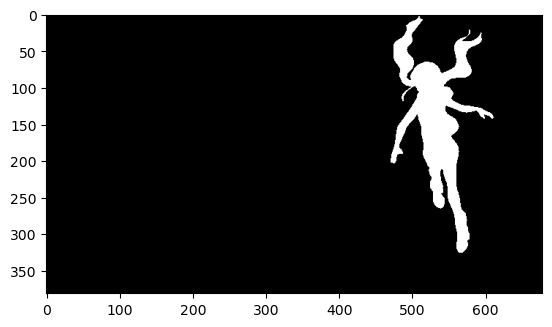

In [48]:
binary_mask = compute_bin_mask(diff_single_channel)

plt.imshow(binary_mask)

In [49]:
def replace_bg(origin_bg, target_bg, ob_image):
    diff_single_channel = calc_diff(origin_bg,ob_image)
    binary_mask = compute_bin_mask(diff_single_channel)

    output = np.where(binary_mask==255, ob_image, target_bg)

    return output

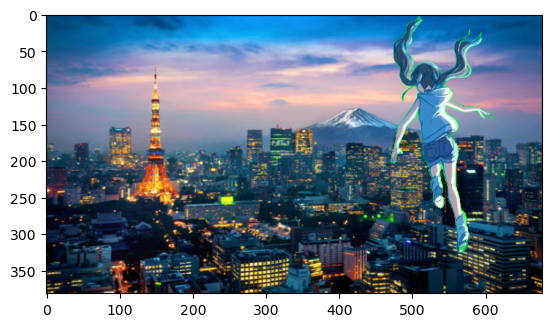

In [50]:
output = replace_bg(origin_bg, target_bg, ob_image)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))